In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rest_data = pd.read_csv('restaurants_v2.csv')

In [3]:
rest_data.head()

,Name,Categories,ReviewsNum,Rating,Zip,Latitude,Longitude,Address
0,Los Agaves,Mexican,3647,4.5,93101,34.427530,-119.686570,"600 N Milpas St Santa Barbara, CA 93101"
1,Brophy Bros - Santa Barbara,Seafood,2826,4.0,93109,34.403759,-119.693992,"119 Harbor Way Santa Barbara, CA 93109"
2,Paula's Pancake House,Breakfast & Brunch,2477,4.0,93463,34.596306,-120.144066,"1531 Mission Dr Solvang, CA 93463"
3,Boathouse at Hendry's Beach,"Seafood, Breakfast & Brunch, American (New)",2334,4.0,93109,34.403257,-119.743752,"2981 Cliff Dr Santa Barbara, CA 93109"
4,Santa Barbara Shellfish Company,"Seafood, Live/Raw Food, Beer Bar",2214,4.0,93101,34.409508,-119.685653,"230 Stearns Wharf Santa Barbara, CA 93101"


In [4]:
Cate_expand = rest_data.Categories.str.split(', ', expand=True)
Cate_unique = pd.unique(Cate_expand.values.ravel('K'))
Cate_unique = Cate_unique[Cate_unique != None]
len(Cate_unique)

129

In [5]:
cate_counts = []
for cate in Cate_unique:
    count = sum(rest_data['Categories'].str.contains(cate, regex=False))
    cate_counts.append(count)
Cate_count = dict(zip(Cate_unique, cate_counts))
Count_sorted = dict(sorted(Cate_count.items(), key=lambda item: item[1], reverse = True))
Count_top = dict(filter(lambda x: x[1] > 10, Count_sorted.items()))
len(Count_top)

33

In [18]:
[*Count_top][:9]

['Bars',
 'Mexican',
 'Pizza',
 'Sandwiches',
 'American (Traditional)',
 'Breakfast & Brunch',
 'Burgers',
 'American (New)',
 'Italian']

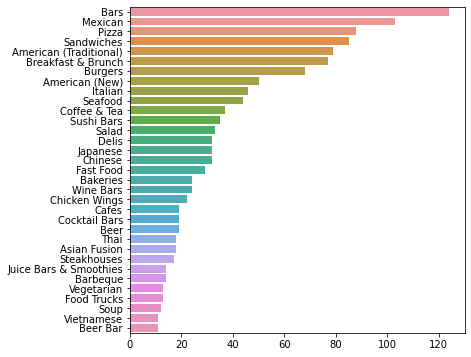

In [6]:
fig_dims = (6, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=list(Count_top.values()), y=[*Count_top], ax = ax)

ValueError: could not convert string to float: 'The Lark'

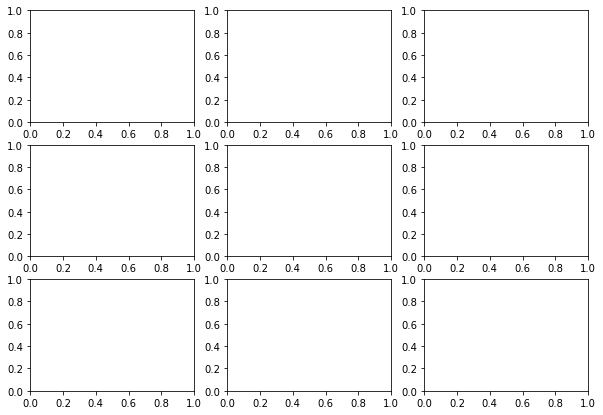

In [26]:
fig, ax = plt.subplots(3, 3, figsize=(10, 7))
ax = ax.flatten()
for i in range(9):
    cate = [*Count_top][i]
    rate = rest_data[rest_data['Categories'].str.contains(cate, regex=False)]
    sns.kdeplot(data = rate, x=['Rating'], ax = ax[i])

In [35]:
code_count={'Categories':[],'zip':[],'count':[]}
for cate in [*Count_top][:10]:
    group = rest_data[rest_data['Categories'].str.contains(cate, regex=False)]
    zip_code = pd.unique(rest_data['Zip'])
    for code in zip_code:
        count = sum(group['Zip'] == code)
        code_count['Categories'].append(cate)
        code_count['zip'].append(code)
        code_count['count'].append(count)

In [41]:
code_count

,Categories,zip,count
0,Bars,93101,33
1,Bars,93109,1
2,Bars,93463,13
3,Bars,93103,1
4,Bars,93105,8
...,...,...,...
235,Seafood,93457,0
236,Seafood,93110,0
237,Seafood,93458,3
238,Seafood,93434,0


In [60]:
code_count = pd.DataFrame.from_dict(code_count)
res =  code_count.sort_values(by=['Categories', 'count'], ascending=False).groupby('Categories').head(3)

In [61]:
res

,Categories,zip,count
216,Seafood,93101,13
222,Seafood,93117,5
217,Seafood,93109,4
72,Sandwiches,93101,14
78,Sandwiches,93117,12
86,Sandwiches,93454,10
48,Pizza,93101,14
65,Pizza,93436,14
54,Pizza,93117,13
30,Mexican,93117,21
